## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, scaler, train=False):
    x = x.reshape((len(x), -1))
    if train:
        scaler.fit(x)
    return scaler.transform(x)

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = preproc_x(x_train, scaler, train=True)
x_test = preproc_x(x_test, scaler, train=False)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidd

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.8378 - acc: 0.3488 - val_loss: 1.6066 - val_acc: 0.4350
Epoch 2/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.5582 - acc: 0.4511 - val_loss: 1.5265 - val_acc: 0.4618
Epoch 3/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.4310 - acc: 0.4981 - val_loss: 1.4322 - val_acc: 0.4960
Epoch 4/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.3309 - acc: 0.5329 - val_loss: 1.4234 - val_acc: 0.4971
Epoch 5/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.2463 - acc: 0.5631 - val_loss: 1.4043 - val_acc: 0.5133
Epoch 6/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.1683 - acc: 0.5902 - val_loss: 1.4017 - val_acc: 0.5172
Epoch 7/100
50000/50000 [==============================] - 4s 81us/step - 

Epoch 58/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0977 - acc: 0.9679 - val_loss: 3.6222 - val_acc: 0.5366
Epoch 59/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.1099 - acc: 0.9631 - val_loss: 3.6140 - val_acc: 0.5211
Epoch 60/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.1133 - acc: 0.9631 - val_loss: 3.5091 - val_acc: 0.5274
Epoch 61/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0983 - acc: 0.9676 - val_loss: 3.6415 - val_acc: 0.5387
Epoch 62/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.1079 - acc: 0.9641 - val_loss: 3.6899 - val_acc: 0.5397
Epoch 63/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0888 - acc: 0.9705 - val_loss: 3.6412 - val_acc: 0.5283
Epoch 64/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0893 - acc: 0.9709 - val_loss: 3.6930 - val_acc: 0.5257
Epoch 65/100
50000/50000 [=

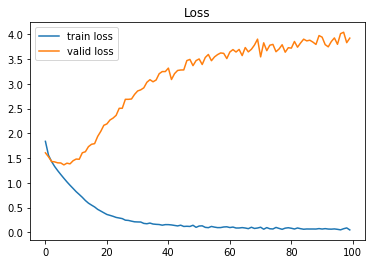

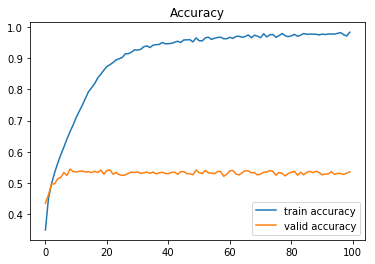

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()